# Análisis de Dataset LEGO
La práctica final de nuestro grupo constará del análisis del dataset publicado por Rachel Tatman, compilado por Rebrickable sobre información de piezas, sets, contenido de sets y colores de piezas de todos los sets originales de LEGO (acualizado hasta Julio de 2017).

Link al dataset:
https://www.kaggle.com/datasets/rtatman/lego-database

Este parece extraido de un esquema de base de datos relacional.

## Análisis Exploratorio

Para comenzar con la práctica, primero importaremos el dataset y aplicar diferentes técnicas explorativas vistas para comprender mejor con qué información contamos, y la relación entre las diferentes características contempladas.

Luego, decidiremos cuál de las preguntas propuestas elegiremos para basar el resto de la práctica integradora.

Estas preguntas pueden ser:

 - ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?
 - ¿Existe alguna asociación entre los colores y las temáticas?
 - ¿Podría predecir a que temática pertenece un set basado en el 
contenido de este? (recomendado)
 - A través de los años, ¿Cuál o cuáles son los sets que tienen las piezas 
más raras?
 - ¿Cómo evolucionaron los colores en los sets de lego a través de los 
años?


El trabajo se enfocará principalmente en la respuesta a
- ¿Podría predecir a que temática pertenece un set basado en el 
contenido de este?


### Sets de Datos

Antes de importar el dataset, podemos bservar dentro de la carpeta /data que éste se encuentra distribuido en diferentes archivos CSV.
Dentro de la carpeta también se encuentra un DER que explica cómo estos datos se asemblan. Describamos por encima el propósito de cada archivo/tabla:

| Archivo/tabla       | Descripción |
| --------------------|-------------|
| colors.csv          | Id, nombre, valores RGB del color de la pieza e indicativo de si es transparente             |             |
| inventories.csv     | Asocia conjuntos de piezas individuales (de determinado color y características, u otros subsets, a un determinado set.            |
| inventory_parts.csv | Asocia un color, cantidad de piezas, y un booleano de repuesto entre un inventario y un tipo de pieza           |
| inventory_sets.csv  | Asocia un set en particular a un inventario (subsets como parte del inventario de otro set).            |
| part_categories.csv | Etiquetas de clasificación de los tipos de pieza LEGO (un Enum)            |
| parts.csv           | Tipos de piezas LEGO, con nombre y una categoría            |
| sets.csv            | Productos LEGO vendidos en sí, son paquetes que incluyen piezas de diversos tipos y subsets. Se guardan diferentes datos como año de lanzamiento, nombre, etc.           |
| themes.csv          | Etiqueta de clasificación de los diferentes sets.            |




In [98]:
# Importamos librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={
    'axes.facecolor': 'black',
    'figure.facecolor': 'black',
    'axes.labelcolor': 'white',
    'xtick.color': 'cyan',
    'ytick.color': 'white',
    'axes.titlecolor': 'white'
})


In [99]:
# Cargamos el dataset
colors = pd.read_csv("./data/colors.csv")
inventories = pd.read_csv("./data/inventories.csv")
inventory_parts = pd.read_csv("./data/inventory_parts.csv")
inventory_sets = pd.read_csv("./data/inventory_sets.csv")
part_categories = pd.read_csv("./data/part_categories.csv")
parts = pd.read_csv("./data/parts.csv")
sets = pd.read_csv("./data/sets.csv")
themes = pd.read_csv("./data/themes.csv")

## Análisis Explorativo

### 1- Visualizar las primeras filas

In [100]:
# Visualizamos las primeras filas del dataset

print("colors:")
display(colors.head())

print("inventories:")
display(inventories.head())


print("inventory_parts:")
display(inventory_parts.head())

print("inventory_sets:")
display(inventory_sets.head())

print("part_categoies:")
display(part_categories.head())

print("parts:")
display(parts.head())

print("sets:")
display(sets.head())

print("themes:")
display(themes.head())

colors:


,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


inventories:


,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


inventory_parts:


,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


inventory_sets:


,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


part_categoies:


,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


parts:


,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


sets:


,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


themes:


,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


Viendo las primeras filas de cada dataframe, observamos que estos datos son de carácter relacional (obtenidos de una base de datos estructurada, por sus llaves primarias y foráneas).

Es por eso que habrá que realizar merging/joining respecto a las preguntas que deseamos responder.

También podemos ver que hay datos que probablemente necesiten ser re-estructurados para servir en propósito comparativo, como lo es el tamaño de las piezas (sus dimensiones no están almacenadas como números).

### 2- Resumen de 5 números

Recordemos que no tiene mucho sentido observar las estadísticas de las variables que son IDs.

In [101]:
# Con Pandas, el R5N es tan facil como utilizar el método .describe() en cada dataframe.

print("colors:")
display(colors.describe())

print("inventories:")
display(inventories.describe())


print("inventory_parts:")
display(inventory_parts.describe())

print("inventory_sets:")
display(inventory_sets.describe())

print("part_categoies:")
display(part_categories.describe())

print("parts:")
display(parts.describe())

print("sets:")
display(sets.describe())

print("themes:")
display(themes.describe())

colors:


,id
count,135.000000
mean,253.037037
std,878.441466
min,-1.000000
25%,34.500000
50%,85.000000
75%,231.000000
max,9999.000000


inventories:


,id,version
count,11681.000000,11681.000000
mean,8412.481551,1.001541
std,4880.737513,0.057018
min,1.000000,1.000000
25%,4156.000000,1.000000
50%,8404.000000,1.000000
75%,12585.000000,1.000000
max,18708.000000,5.000000


inventory_parts:


,inventory_id,color_id,quantity
count,580251.000000,580251.000000,580251.000000
mean,8605.285444,78.472787,3.324730
std,4958.375522,622.238597,8.229816
min,1.000000,-1.000000,1.000000
25%,4352.000000,1.000000,1.000000
50%,8635.000000,15.000000,2.000000
75%,12794.000000,71.000000,4.000000
max,18708.000000,9999.000000,1440.000000


inventory_sets:


,inventory_id,quantity
count,2846.000000,2846.000000
mean,8017.497892,1.375966
std,4798.898759,4.563002
min,35.000000,1.000000
25%,3691.750000,1.000000
50%,7902.000000,1.000000
75%,11476.000000,1.000000
max,18701.000000,60.000000


part_categoies:


,id
count,57.000000
mean,29.000000
std,16.598193
min,1.000000
25%,15.000000
50%,29.000000
75%,43.000000
max,57.000000


parts:


,part_cat_id
count,25993.000000
mean,19.491825
std,12.314862
min,1.000000
25%,13.000000
50%,13.000000
75%,27.000000
max,57.000000


sets:


,year,theme_id,num_parts
count,11673.000000,11673.000000,11673.000000
mean,2001.972758,311.308575,162.262400
std,13.475364,177.999101,330.192108
min,1950.000000,1.000000,-1.000000
25%,1997.000000,161.000000,10.000000
50%,2005.000000,324.000000,45.000000
75%,2012.000000,470.000000,172.000000
max,2017.000000,614.000000,5922.000000


themes:


,id,parent_id
count,614.000000,503.000000
mean,307.500000,274.294235
std,177.390811,176.070151
min,1.000000,1.000000
25%,154.250000,126.000000
50%,307.500000,264.000000
75%,460.750000,430.000000
max,614.000000,591.000000


### 3- Tipos de variables

Veamos cada variable de cada DataFram e identifiquemos su tipo y carácter informativo

- inventory_sets

| Variable| Tipo | Informativa|
| --------|------|------------|
|inventory_id |Identificador |No |
|set_num|Categórico|Sí|
|quantity|Cardinal (discreto)|Sí|

- inventories

| Variable| Tipo | Informativa|
| --------|------|------------|
|id|Identificador |No |
|version |Ordinal |Sí |
|set_num|Categórico|Sí|

- sets

| Variable| Tipo | Informativa|
| --------|------|------------|
|set_num|Identificador|No|
|name|Categórico (nominal)|No|
|year|Ordinal (discreto) o categórico|Sí|
|theme_id|Categórico|Sí|
|num_parts|Numérico (discreto)|Sí|

- themes

| Variable| Tipo | Informativa|
| --------|------|------------|
|id|Identificador|No|
|name|Categórico (nominal)|No|

- inventory_parts

| Variable| Tipo | Informativa|
| --------|------|------------|
|inventory_id|Categórico|Sí|
|part_num|Identificador)|No|
|color_id|Categórico (nominal)|Sí|
|quantity|Cardinal (discreto)|Sí|
|is_spare|Binario/Categórico (nominal)|Sí|

- parts

| Variable| Tipo | Informativa|
| --------|------|------------|
|part_num|Identificador|No|
|part_cat_id|Categórico (nominal)|Sí|

- part_categories

| Variable| Tipo | Informativa|
| --------|------|------------|
|id|Identificador|No|
|name|Categórico (nominal)|No|

- colors

| Variable| Tipo | Informativa|
| --------|------|------------|
|id|Identificador|No|
|name|Categórico (nominal)|No (descartada por redundancia respecto a rgb)|
|rgb|Categórico (dividible en ordinales) |Sí|
|is_trans|Booleano/Categórico (nominal)|Sí|






### 4- Identificar variables de entrada y salida del problema

Ya que buscamos responder principalmente la pregunta predictiva:
- ¿Podría predecir a que temática pertenece un set basado en el 
contenido de este?

Interpretaremos a cada theme como una categoría (nuestra variable de salida). Dado que el theme resulta ser simplemente un label (solo contiene un nombre y un identificador), podemos usar cualquiera de esos dos campos para establecer nuestra categorización (los nombres resultan más rápidos de interpretar, sin tneer que ser reemplazados).

Por otro lado, nuestras variables de entrada requerirán un poco de ingeniería de features para ser manejables. Los contenidos de un set son muy complejos, ya que en cada set tenemos muchos conjuntos de piezas con características únicas en cada caso. Nuestro array de entrada debera ser una función de toda esta información. Considerando que el dataset no es demasiado masivo, podremos permitirnos un proceso iterativo para encontrar cómo crear estas funciones. Un ejemplo y propuesta inicial podría ser:

- Conteo de partes: La cantidad de piezas en un conjunto puede ser indicativa del tema.
- Colores predominantes
- Cantidad de colores únicos: Diversidad de colores
- Cantidad de categorías de partes: Categorías únicas usadas en el set.
- Cantidad de partes únicas: La diversidad de piezas podría ser un indicador del tema.
- Año de lanzamiento (year): Los temas pueden cambiar con el tiempo, lo que podría influir en el diseño de los conjuntos.
- Frecuencia de partes (part_num): Algunas partes pueden ser exclusivas o más comunes en ciertos temas.
- Repuesto (is_spare): La presencia de repuestos podría tener alguna relación con el tema.

### 5- Variables de entrada

Comenzaremos crafteando las variables de entrada propuestas en función a los datos que tenemos, y lo guardaremos en un nuevo DataFrame (al que llamaremos 'input').


In [102]:
# La primera propuesta ya es parte del DataFrame (cantidad total de piezas).

# La segunda, colores únicos por set:
sets_inventories = pd.merge(inventory_sets, inventories, on='set_num')
sets_parts = pd.merge(sets_inventories, inventory_parts, on='inventory_id')
sets_colors = pd.merge(sets_parts, colors, left_on='color_id',right_on="id")
unique_colors_per_set = sets_colors.groupby('set_num')['color_id'].nunique()
unique_colors_per_set = unique_colors_per_set.reset_index(name='unique_colors')
input = pd.merge(sets, unique_colors_per_set, on='set_num')

# Categorías únicas por set, muy similar al punto anterior
df_parts_with_categories = pd.merge(inventory_parts, parts, on='part_num')
df_parts_with_full_categories = pd.merge(df_parts_with_categories, part_categories, left_on='part_cat_id', right_on='id')
df_inventory_with_categories = pd.merge(df_parts_with_full_categories, inventories, left_on='inventory_id', right_on='id')
df_set_with_categories = pd.merge(df_inventory_with_categories, inventory_sets, on='set_num')
unique_categories_per_set = df_set_with_categories.groupby('set_num')['part_cat_id'].nunique()
unique_categories_df = unique_categories_per_set.reset_index(name='unique_part_categories')
input = pd.merge(input, unique_categories_df, on='set_num', how='left')

# Partes únicas del set
df_parts_inventories = pd.merge(inventory_parts, inventories, left_on='inventory_id', right_on='id')
df_sets_parts = pd.merge(df_parts_inventories, inventory_sets, on='set_num')
unique_parts_per_set = df_sets_parts.groupby('set_num')['part_num'].nunique()
unique_parts_df = unique_parts_per_set.reset_index(name='unique_parts_count')
input = pd.merge(input, unique_parts_df, on='set_num')


# Nos deshacemos de todas las variables no informativas del esquema de input.
input = input.drop(columns=['name','set_num'])




input.head()




,year,theme_id,num_parts,unique_colors,unique_part_categories,unique_parts_count
0,2003,461,56,7,9.0,27
1,2006,236,969,2,23.0,137
2,2009,240,1089,1,30.0,147
3,2013,240,1349,1,34.0,168
4,1980,533,158,8,14.0,44


Habiendo definido nuestra variable de salida, resulta relevante ver su distribución a lo largo de los sets. Para esto veremos un gráfico de las ocurrencias de cada temática:

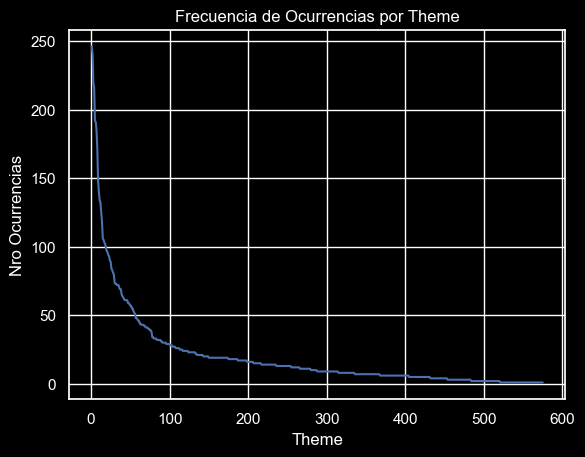

'Hay un total de 575 temáticas usadas, acumulando el 80% de ocurrencias en 205 de ellas.'

In [117]:
sns.set(rc={
    'axes.facecolor': 'black',
    'figure.facecolor': 'black',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.titlecolor': 'white'
})

# Utilizamos la tabla de conteo de ocurrencias de Pandas
count = sets['theme_id'].value_counts()
count.index = range(1,count.index.size + 1)

# Creamos un gráfico
sns.lineplot(x=count.index, y=count.values)


plt.title('Frecuencia de Ocurrencias por Theme')
plt.xlabel('Themes')
plt.ylabel('Nro Ocurrencias')

plt.show()


cumsum = count.cumsum()
totsum = cumsum.iloc[-1]
acc_80 = cumsum[cumsum <= totsum *0.8].count()

display(f"Hay un total de {cumsum.size} temáticas usadas, acumulando el 80% de ocurrencias en {acc_80} de ellas.")




Observamos que hay sólo 575 temáticas únicas avistadas en el dataframe de sets, cuando anteriormente observamos que tenemos un total de 614 (hay temáticas no observadas).

También puede verse que la relación entre temáticas y sets no es muy equilibrada. Hay temáticas que aparecen en muchos sets, y hay algunas que en pocos (incluso algunas en 1 sólo set). Deberemos decidir que hacer con esto, ya que cierto porcentaje de las categorías posibles podría no acumular suficientes ocurrencias como para ser relevante.

Aunque esto ya entra dentro de la limpieza de los datos, resulta oportuno eliminar las temáticas sin ocurrencias.

In [104]:
# Encontramos las temáticas referenciadas.
ref_themes = sets['theme_id'].unique()

# Filtramos las filas y sobreescribimos themes sólo con las temáticas en uso.
themes = themes[themes['id'].isin(ref_themes)]

## Limpieza y preparacón de los datos / Ingeniería de features



### 1- Datos faltantes



In [105]:
# Realicemos una contabilización y visualización de los datos faltantes en cada variable:

# Función para crear DF de análisis de faltantes:

def missing_values (df):
    df_mv_count = df.isnull().sum()
    df_mv_per = (df_mv_count / len(df)) * 100
    df_mv = pd.DataFrame({'Cantidad faltantes': df_mv_count,
                                  'Porcentaje faltante': df_mv_per})
    return df_mv


# Visualizamos:

print("\ncolors:")
display(missing_values(colors))

print("\ninventories:")
display(missing_values(inventories))

print("\ninventory_parts:")
display(missing_values(inventory_parts))

print("\ninventory_sets:")
display(missing_values(inventory_sets))

print("\npart_categoies:")
display(missing_values(part_categories))

print("\nparts:")
display(missing_values(parts))

print("\nsets:")
display(missing_values(sets))

print("\nthemes:")
display(missing_values(themes))


colors:


,Cantidad faltantes,Porcentaje faltante
id,0,0.0
name,0,0.0
rgb,0,0.0
is_trans,0,0.0



inventories:


,Cantidad faltantes,Porcentaje faltante
id,0,0.0
version,0,0.0
set_num,0,0.0



inventory_parts:


,Cantidad faltantes,Porcentaje faltante
inventory_id,0,0.0
part_num,0,0.0
color_id,0,0.0
quantity,0,0.0
is_spare,0,0.0



inventory_sets:


,Cantidad faltantes,Porcentaje faltante
inventory_id,0,0.0
set_num,0,0.0
quantity,0,0.0



part_categoies:


,Cantidad faltantes,Porcentaje faltante
id,0,0.0
name,0,0.0



parts:


,Cantidad faltantes,Porcentaje faltante
part_num,0,0.0
name,0,0.0
part_cat_id,0,0.0



sets:


,Cantidad faltantes,Porcentaje faltante
set_num,0,0.0
name,0,0.0
year,0,0.0
theme_id,0,0.0
num_parts,0,0.0



themes:


,Cantidad faltantes,Porcentaje faltante
id,0,0.000000
name,0,0.000000
parent_id,103,17.913043


Podemos observar que este dataset no cuenta con datos faltantes. La única variable con ocurrencias no computadas es el 'parent_id' de algunos 'themes'. Sin embargo, dado el contexto y el gran porcentaje de estos faltantes (18%), se entiende que en realidad el valor nulo es uno "válido".

Observemos algunos de estos valores para verificar esta hipótesis:

In [106]:
display(themes[themes.isna().any(axis=1)])

,id,name,parent_id
0,1,Technic,NaN
21,22,Creator,NaN
49,50,Town,NaN
111,112,Racers,NaN
125,126,Space,NaN
...,...,...,...
604,605,Nexo Knights,NaN
605,606,Angry Birds,NaN
606,607,Ghostbusters,NaN
607,608,Disney,NaN


Podemos ver que estas son "themes padre". por lo cual la computación de NaN es válida, haciendo referencia a que el theme no es una sub-categoría.

Antes de continuar, aprovehcaremos esta observación para simplificar nuestro problema. Descartaremos todas las temáticas que tengan una temática padre, para quedarnos sólo con las super-temáticas. Antes, reemplazaremos en el DataFrame de "sets", así cada set apunta a la temática padre de su temática.

Como la temática es nuestra variable de salida, esto achicará bastante las categorías de clasificación del problema.

In [107]:
# Reemplazamos los theme_id por las supertemáticas


# En un dataframe auxiliar, mergeamos el frame de input con el de themes
aux_input = pd.merge(input,themes,left_on='theme_id',right_on='id',how='left')

# Para cada fila, reemplazamos el theme_id por su padre (sólo si el padre no es nulo, si no ya es un padre).
aux_input['theme_id'] = aux_input.apply(
    lambda row: row['parent_id'] if pd.notna(row['parent_id']) else row['theme_id'],
    axis = 1
)

# Nos deshacemos de las columnas que se adicionaron en el merge.
input = aux_input[input.columns]

display(input.head())

,year,theme_id,num_parts,unique_colors,unique_part_categories,unique_parts_count
0,2003,458.0,56,7,9.0,27
1,2006,233.0,969,2,23.0,137
2,2009,233.0,1089,1,30.0,147
3,2013,233.0,1349,1,34.0,168
4,1980,507.0,158,8,14.0,44


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


y = input['theme_id']
X = input.drop(['theme_id'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



dectree = DecisionTreeClassifier(criterion='entropy',max_depth=None)
dectree.fit(X_train,y_train)
y_pred = dectree.predict(X_test)

print(classification_report(y_test, y_pred,zero_division=True))



              precision    recall  f1-score   support

        22.0       1.00      0.00      0.00         1
       158.0       0.00      0.00      1.00         2
       186.0       0.50      0.50      0.50         2
       217.0       1.00      1.00      1.00        13
       241.0       0.00      0.00      1.00         1
       296.0       0.00      1.00      0.00         0
       324.0       1.00      1.00      1.00         6
       397.0       0.00      1.00      0.00         0
       411.0       1.00      0.00      0.00         1
       438.0       1.00      1.00      1.00         2
       458.0       1.00      0.75      0.86         4
       465.0       1.00      0.00      0.00         1
       478.0       1.00      1.00      1.00         1
       497.0       0.00      1.00      0.00         0
       507.0       0.00      1.00      0.00         0
       529.0       0.00      1.00      0.00         0

    accuracy                           0.76        34
   macro avg       0.53   